In [4]:
# 🍇 Wild Blueberry Yield Prediction
# A challenging task in agricultural sector is to accurately predict crop yield. Machine learning
# algorithms often use real data to predict crop yield.
# In this problem, a dataset was generated by the Wild Blueberry Pollination Simulation Model, an open
# source simulation program, validated by the field observations and experimental data collected in
# Maine USA and Canadian Maritimes during the last 30 years.
#
# Problem statement: The target feature is yield which is a continuous variable. The task is to
# predict this variable based on the other 17 features. The evaluation metrics will be RMSE score
#


In [5]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Set the path to the dataset on Google Drive
file_path = '/content/drive/MyDrive/Datasets/WildBlueberryPollinationSimulationData.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

In [9]:
# Basic Data Exploration
# Checking the shape of the data, columns of the data, datatypes
# Looking for missing values, duplicates
# Statistical description of the data

In [10]:
# Display the first few rows of the dataset
print("Head of the dataset:")
print(df.head())

Head of the dataset:
   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0     0       37.5      0.75     0.25     0.25   0.25              86.0   
1     1       37.5      0.75     0.25     0.25   0.25              86.0   
2     2       37.5      0.75     0.25     0.25   0.25              94.6   
3     3       37.5      0.75     0.25     0.25   0.25              94.6   
4     4       37.5      0.75     0.25     0.25   0.25              86.0   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              52.0                  71.9              62.0              30.0   
2              57.2                  79.0              68.2              33.0   
3              57.2                  79.0              68.2              33.0   
4              52.0                  71.9              62.0              30.0   

   AverageOfLowerTRange  RainingDays  Ave

In [11]:
# Display the last few rows of the dataset
print("\nTail of the dataset:")
print(df.tail())


Tail of the dataset:
     Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
772   772       10.0     0.537    0.117    0.409  0.058              86.0   
773   773       40.0     0.537    0.117    0.409  0.058              86.0   
774   774       20.0     0.537    0.117    0.409  0.058              86.0   
775   775       20.0     0.537    0.117    0.409  0.058              89.0   
776   776       20.0     0.537    0.117    0.409  0.058              89.0   

     MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
772              52.0                  71.9              62.0   
773              52.0                  71.9              62.0   
774              52.0                  71.9              62.0   
775              39.0                  65.6              66.0   
776              39.0                  65.6              66.0   

     MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
772              30.0                  50.8 

In [12]:
# Display a random sample of rows from the dataset
print("\nSample of the dataset:")
print(df.sample(5))


Sample of the dataset:
     Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
279   279       12.5      0.25     0.25     0.63   0.63              86.0   
64     64       12.5      0.25     0.25     0.25   0.25              77.4   
351   351       12.5      0.25     0.25     0.75   0.75              77.4   
333   333       12.5      0.25     0.25     0.75   0.63              69.7   
199   199       12.5      0.25     0.25     0.38   0.75              86.0   

     MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
279              52.0                  71.9              62.0   
64               46.8                  64.7              55.8   
351              46.8                  64.7              55.8   
333              42.1                  58.2              50.2   
199              52.0                  71.9              62.0   

     MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
279              30.0                  50.

In [13]:
# Display each column and its data type
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object


In [14]:
# Check for null values in entire dataset and display the count for each column
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [15]:
# Below method summarises the above info into a single table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [16]:
# Check for duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows in the Dataset:")
print(duplicates)


Duplicate Rows in the Dataset:
Empty DataFrame
Columns: [Row#, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays, fruitset, fruitmass, seeds, yield]
Index: []


In [17]:
# Count of total duplicate rows
total_duplicates = df.duplicated().sum()
print("\nTotal Count of Duplicate Rows in the Dataset:", total_duplicates)


Total Count of Duplicate Rows in the Dataset: 0


In [18]:
# Get the statistical summary of the numerical columns
statistical_summary = df.describe()

# Display the statistical summary
print("Statistical Summary of Numerical Columns:")
print(statistical_summary)


Statistical Summary of Numerical Columns:
             Row#   clonesize    honeybee     bumbles     andrena       osmia  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean   388.000000   18.767696    0.417133    0.282389    0.468817    0.562062   
std    224.444871    6.999063    0.978904    0.066343    0.161052    0.169119   
min      0.000000   10.000000    0.000000    0.000000    0.000000    0.000000   
25%    194.000000   12.500000    0.250000    0.250000    0.380000    0.500000   
50%    388.000000   12.500000    0.250000    0.250000    0.500000    0.630000   
75%    582.000000   25.000000    0.500000    0.380000    0.630000    0.750000   
max    776.000000   40.000000   18.430000    0.585000    0.750000    0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count        777.000000        777.000000            777.000000   
mean          82.277091         49.700515             68.723037   
std            9.193745    

In [19]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Check if there are any categorical columns
if not categorical_columns.empty:
    # Get the statistical summary for categorical columns
    categorical_summary = df[categorical_columns].describe(include='object')

    # Display the statistical summary for categorical columns
    print("\nStatistical Summary of Categorical Columns:")
    print(categorical_summary)
else:
    print("No categorical columns in the dataset.")


No categorical columns in the dataset.


In [20]:
# Some bbservations:
# Very clean data set
# No missing values and duplicate records
# Number of observations: 777
# Number of columns: 18
# Memory Usage: 109.4 KB
# Number of boolean columns: 0
# Number of category columns: 0
# Number of float columns: 17
# Number of int columns: 1 , Row number
# Number of columns with missing values: 0


In [21]:
# Some visualizations of dataset included below

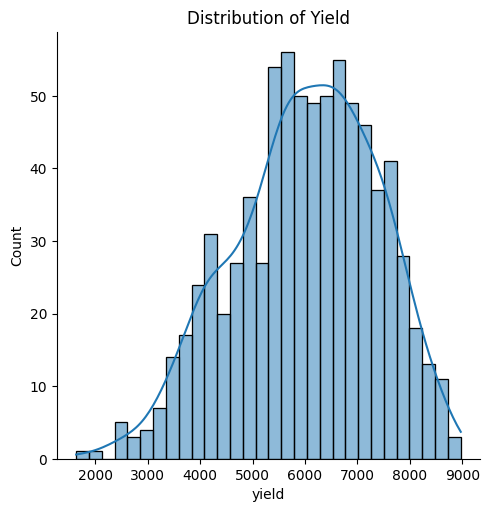

In [22]:
# Distribution Plot of target variable Yield. Shows a bell curve
sns.displot(df['yield'], kde=True, bins=30)
plt.title("Distribution of Yield")
plt.show()

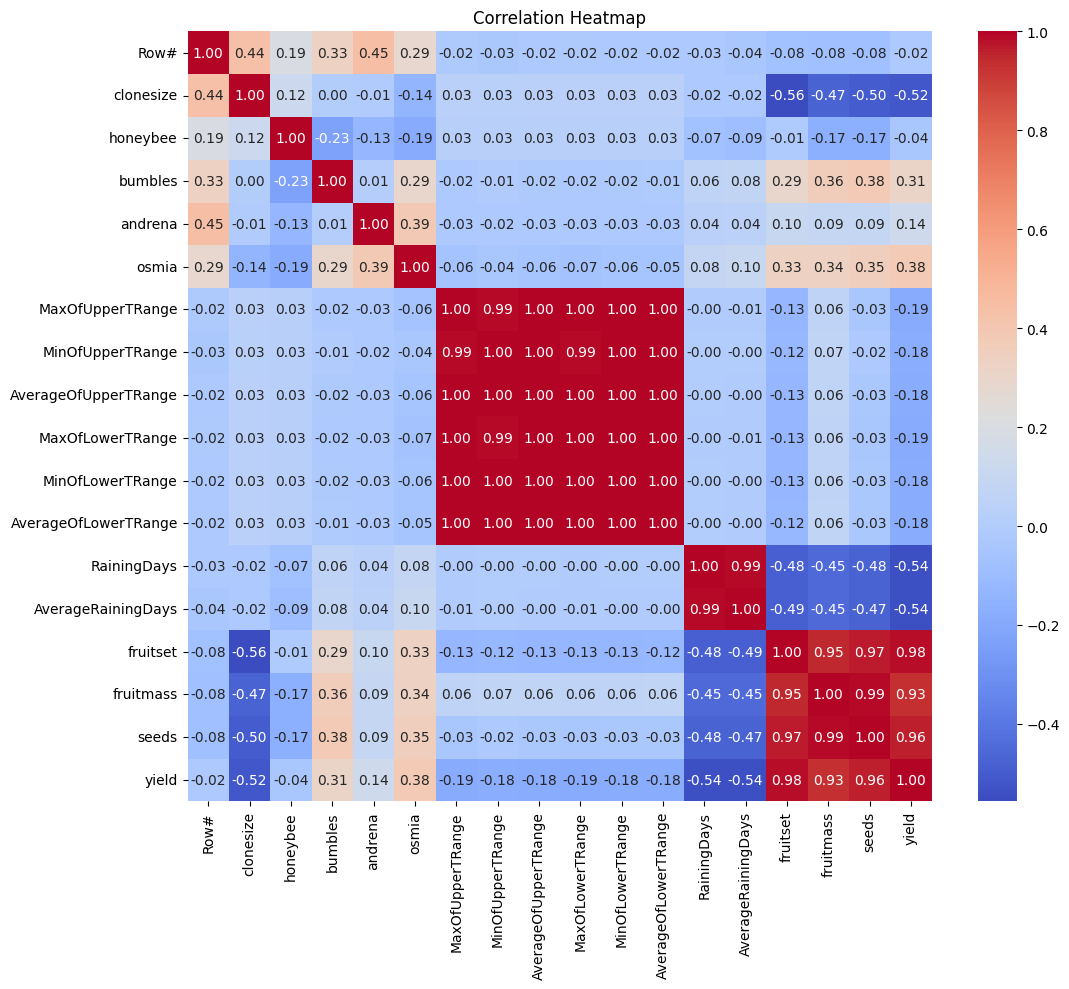

In [23]:
# Correlation Heatmap: Visualizing correlation between numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Some Observations:
# Straight forward strong linear relationship between FruitSet, FruitMass, Seeds and the target variable Yield
# therefore these columns can be dropped. Its same like acceleration has strong, linear relation with speed.
# All 6 temperature columns have very similar characteristics, so to simplify the dataset and reduce the data
# only one of them, as a representative, can be used in model training, max of upper temperature range.
# Same argument for rainy days and average rainy days, so only raining days will be used.
#

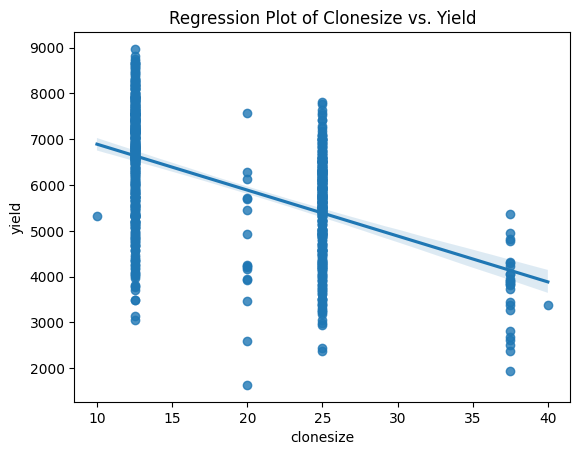

In [26]:
# As an example, Regression Plot of clonesize with yield is included below.
# It shows -ve corelation of yield with clonesize.
sns.regplot(x='clonesize', y='yield', data=df)
plt.title("Regression Plot of Clonesize vs. Yield")
plt.show()

In [ ]:
# Using sweetviz library to find various metrics and determine correlation of features with yield
!pip install sweetviz
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


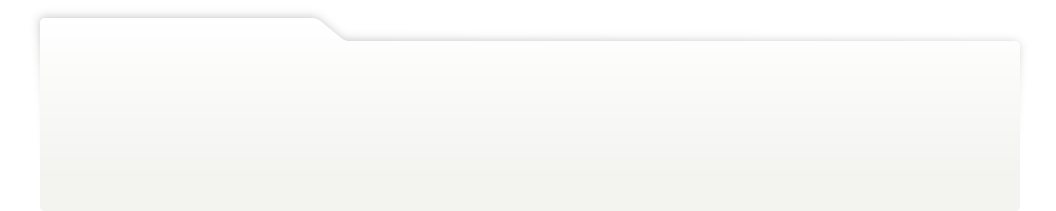
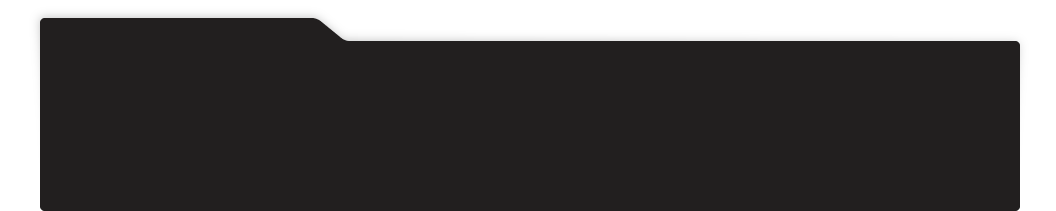
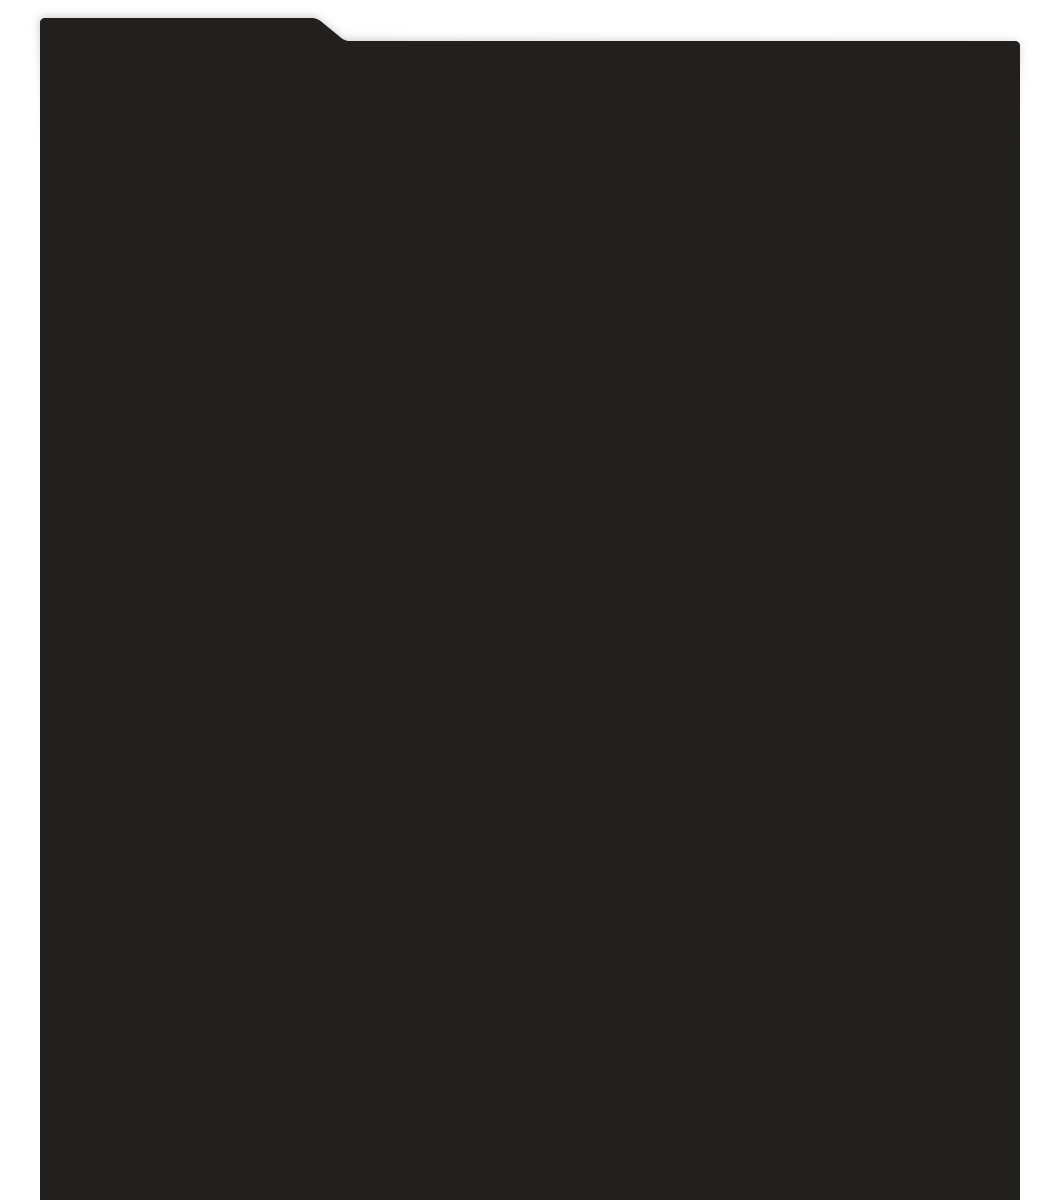
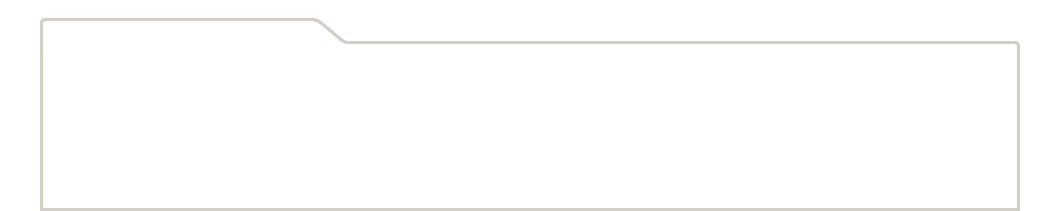
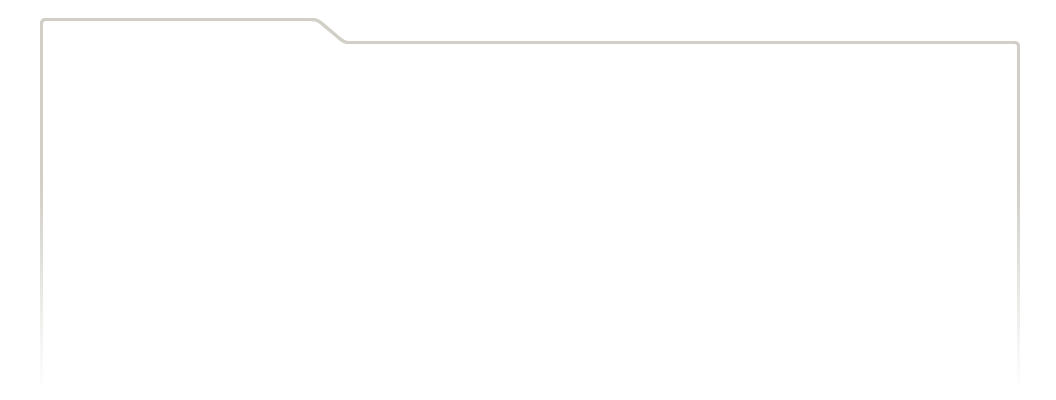
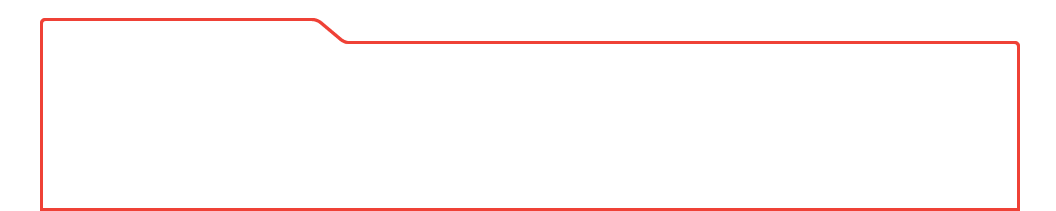
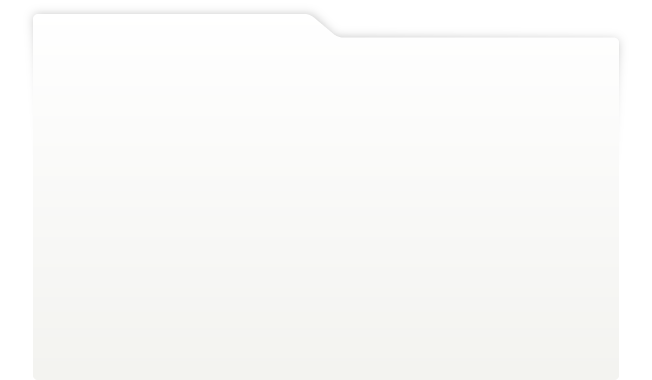
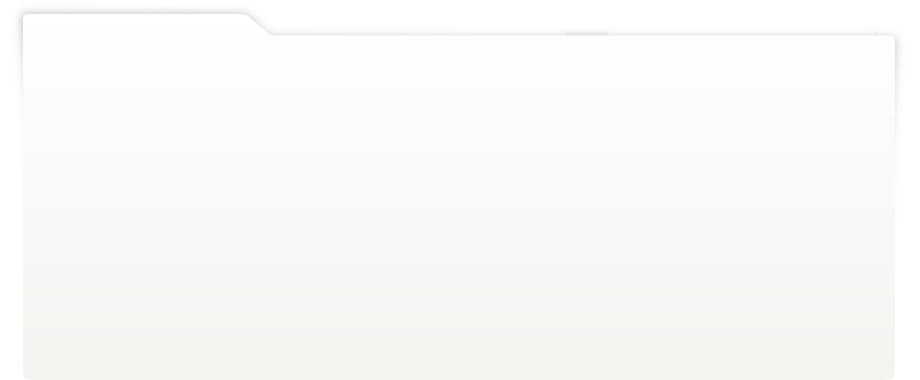
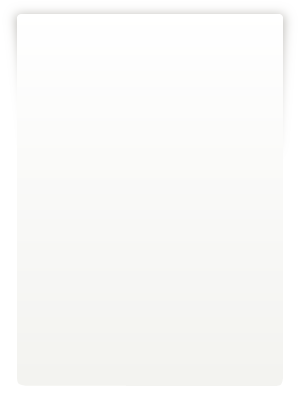
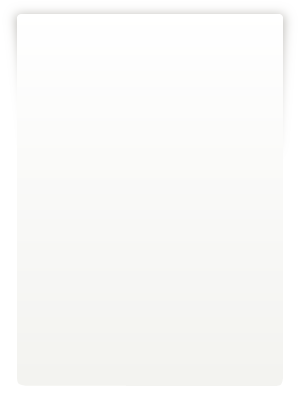
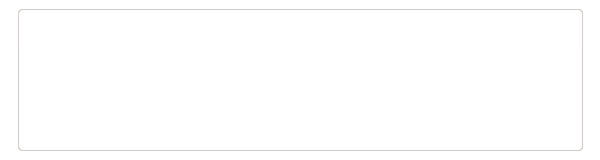
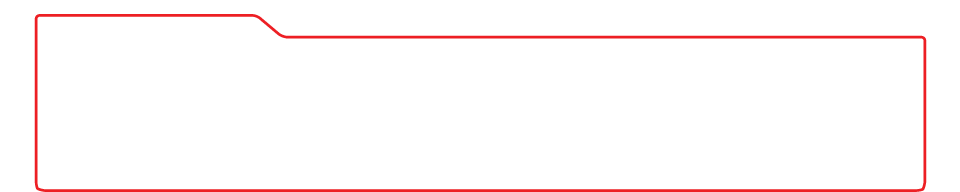
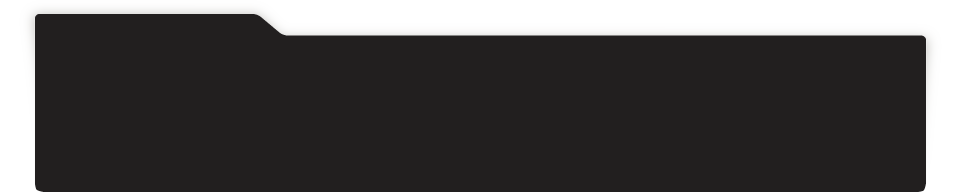
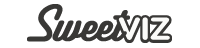
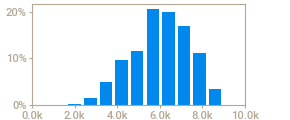
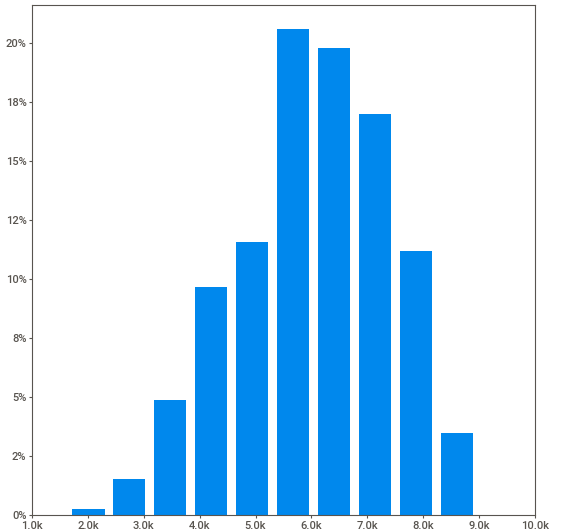
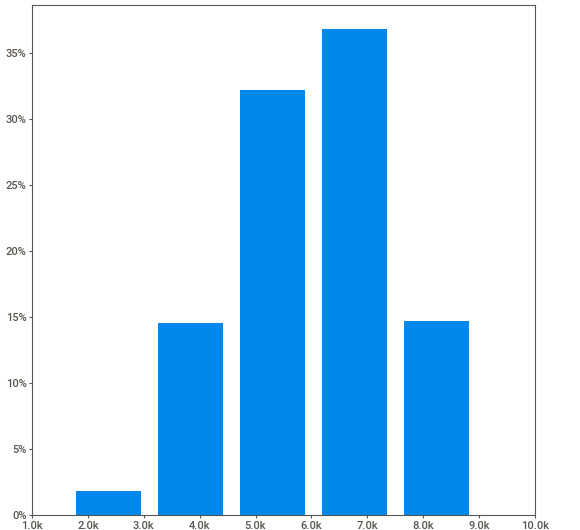
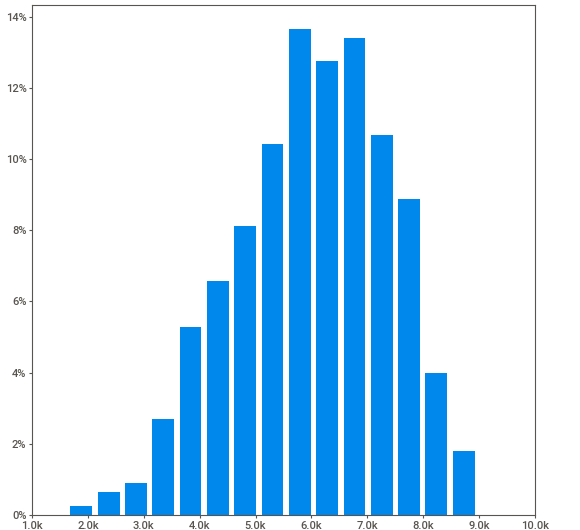
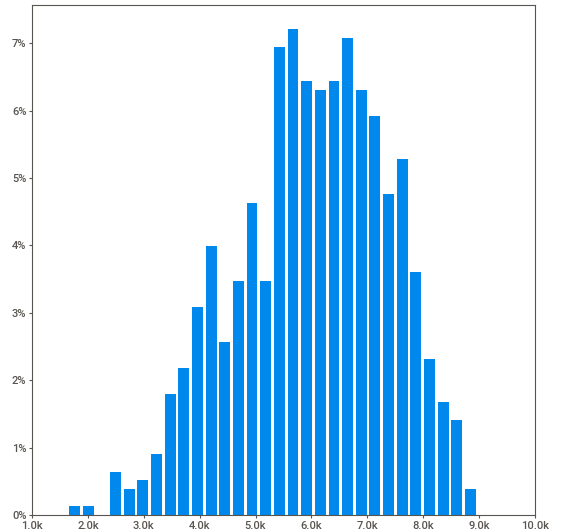
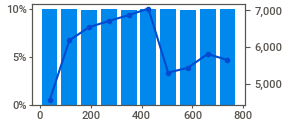
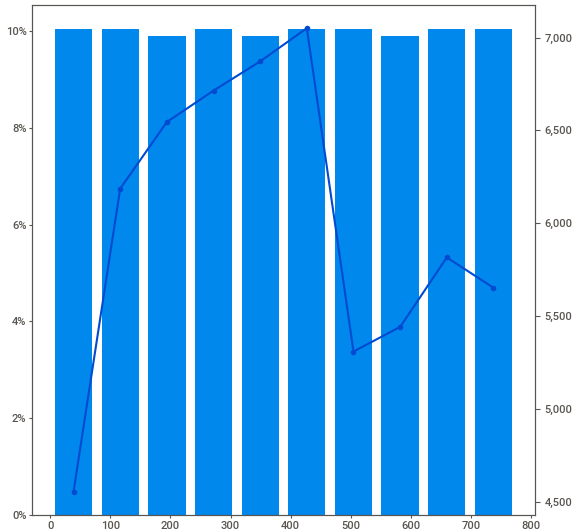
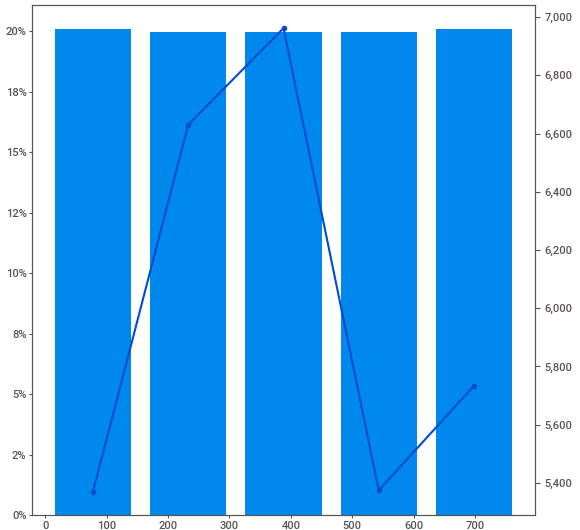
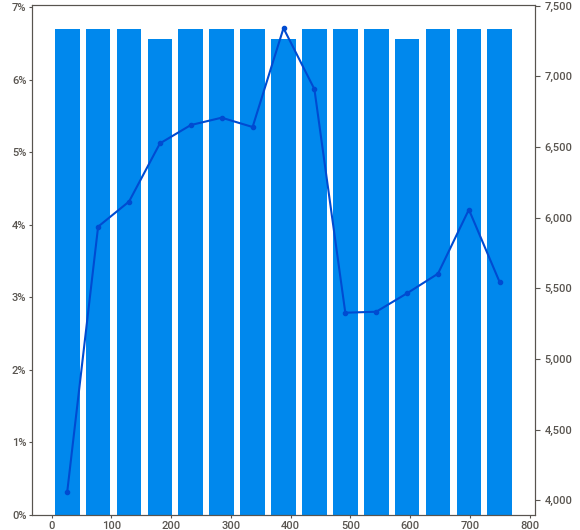
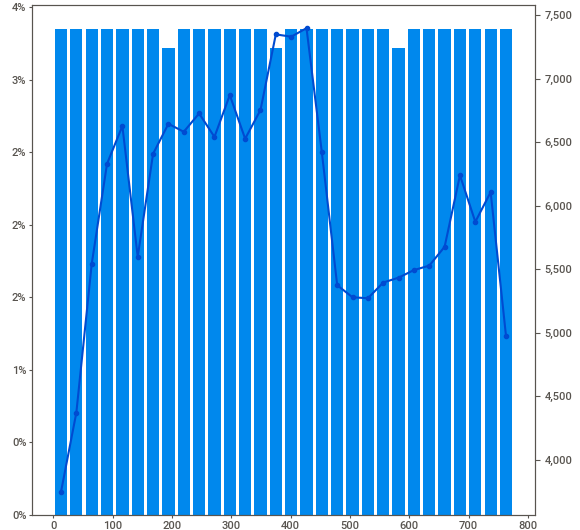
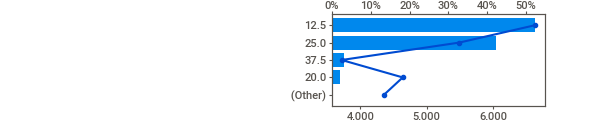
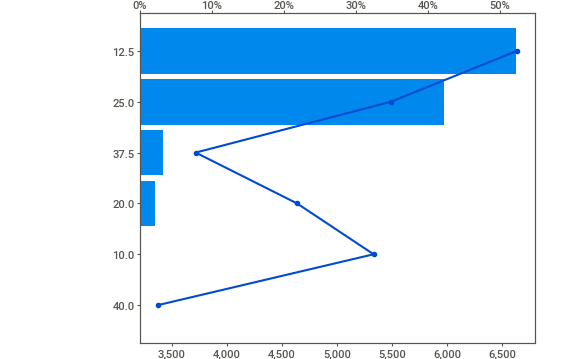
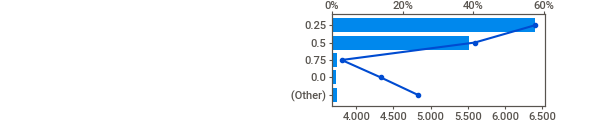
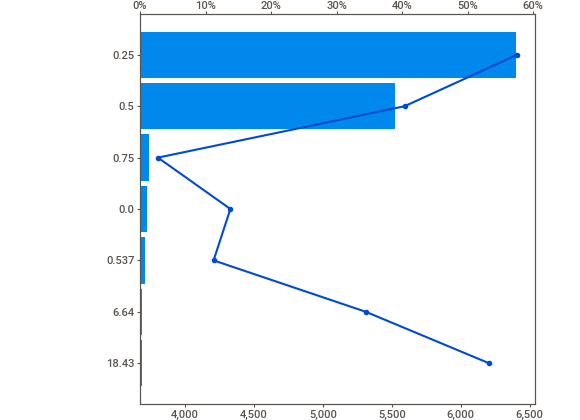
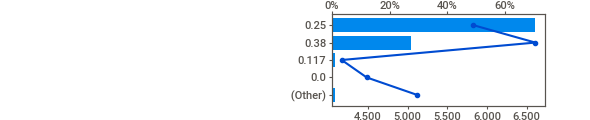
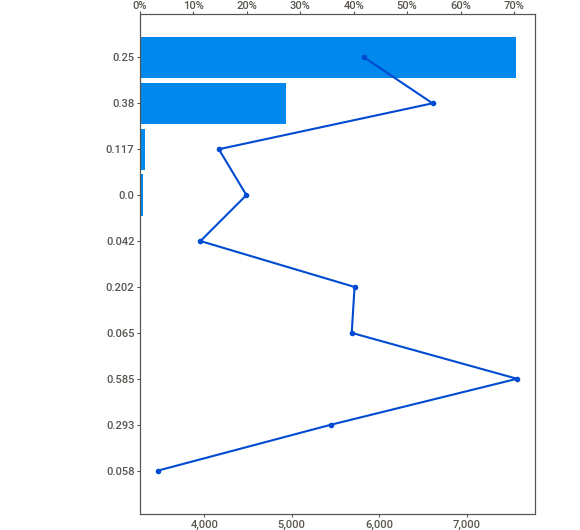
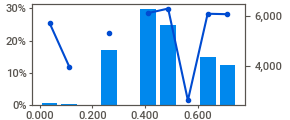
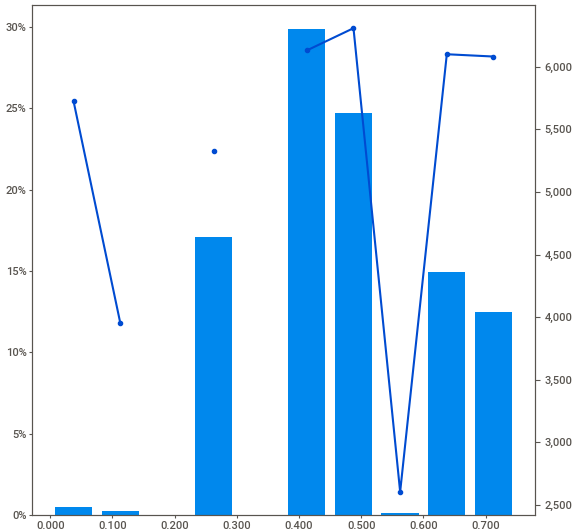
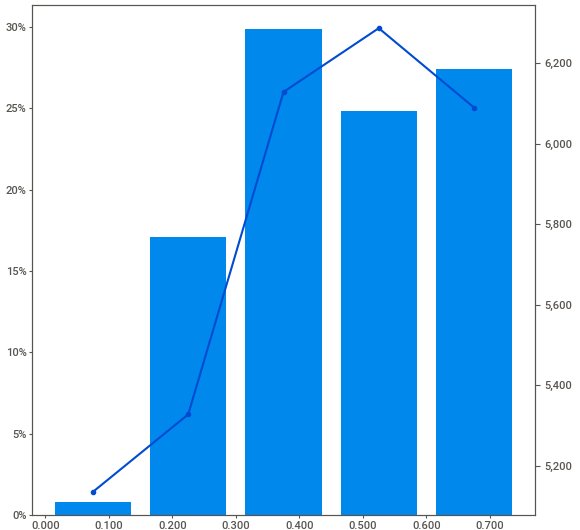
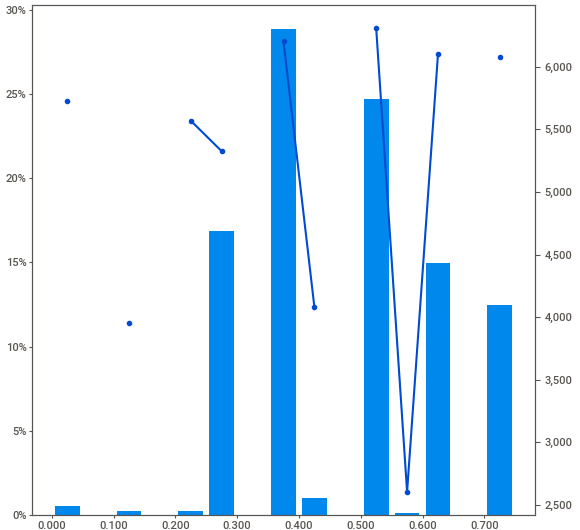
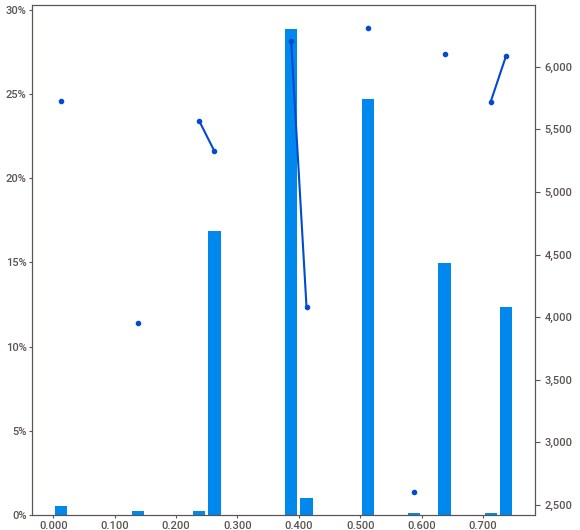
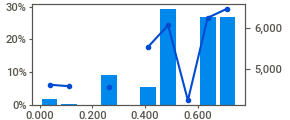
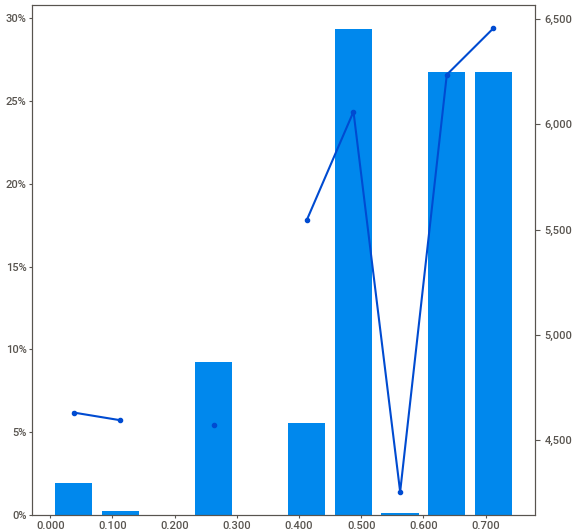
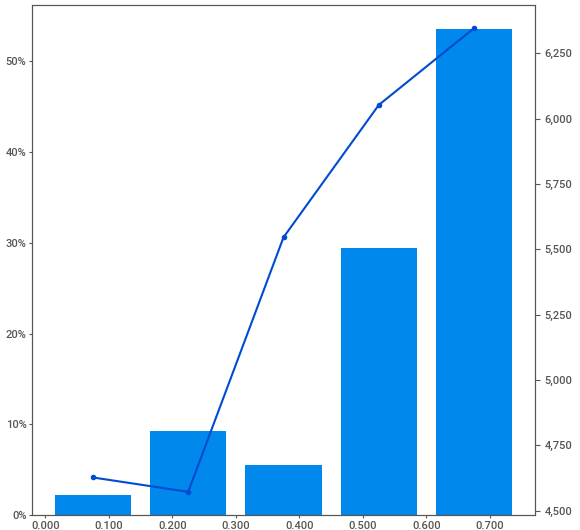
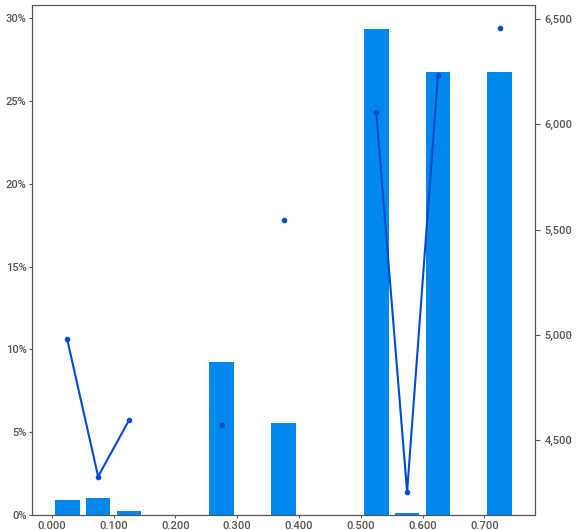
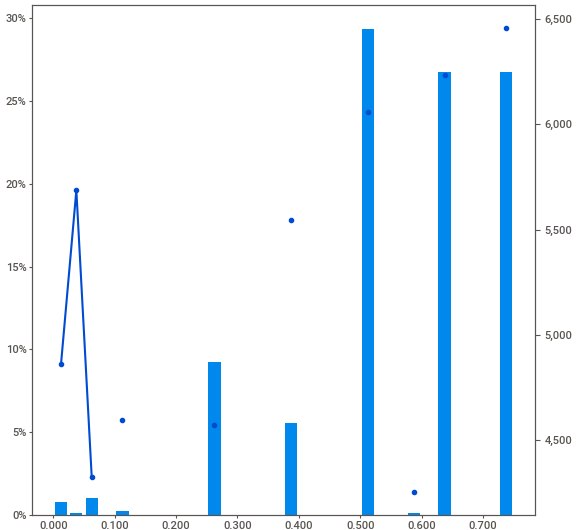
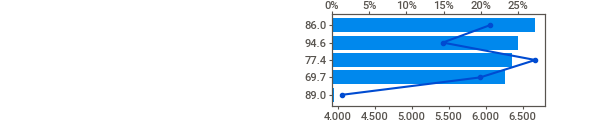
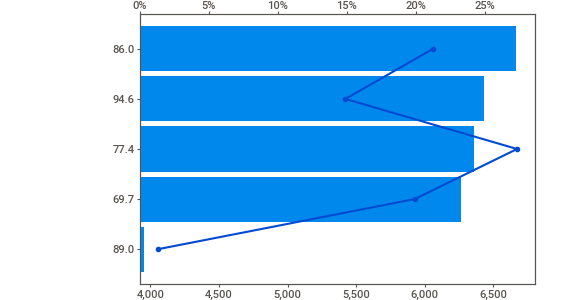
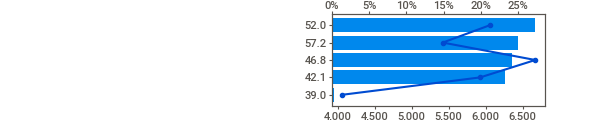
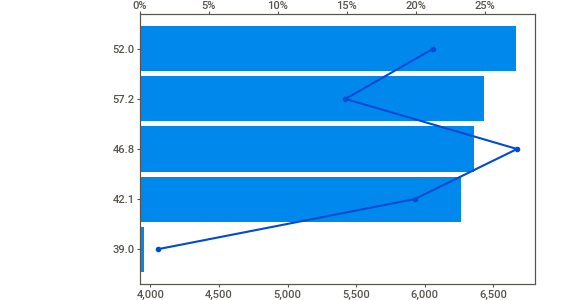
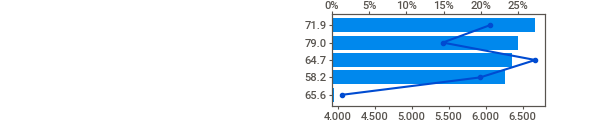
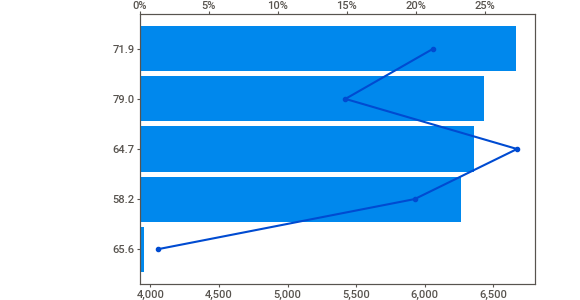
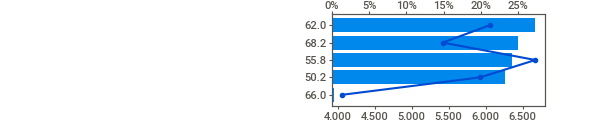
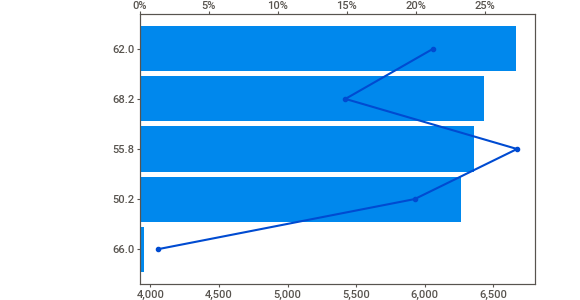
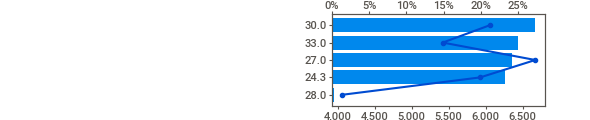
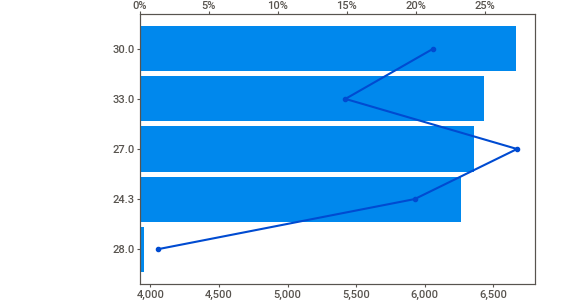
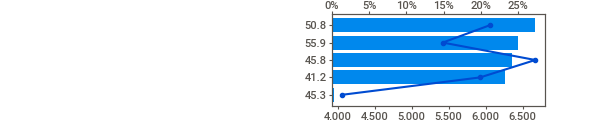
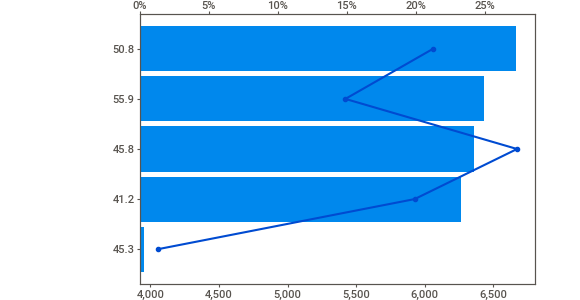
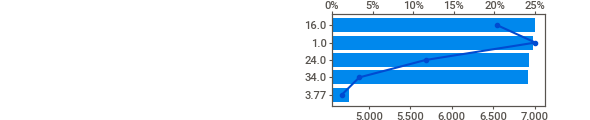
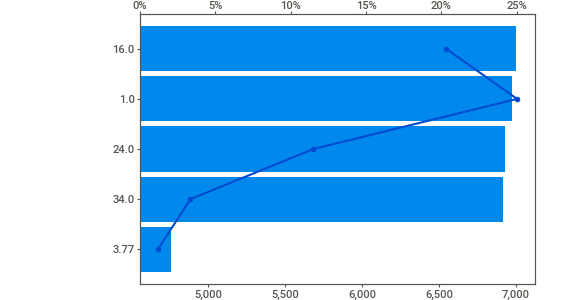
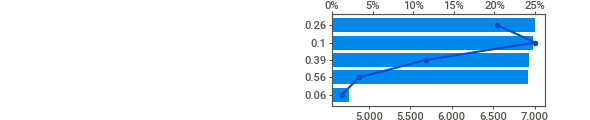
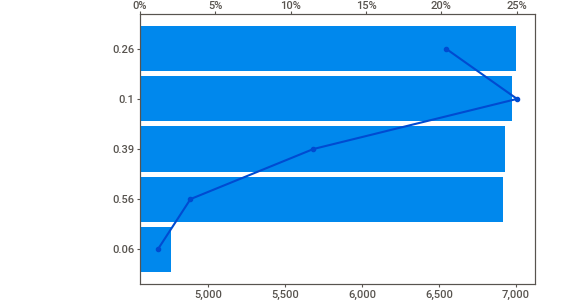
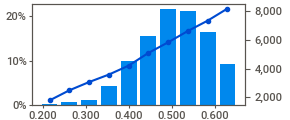
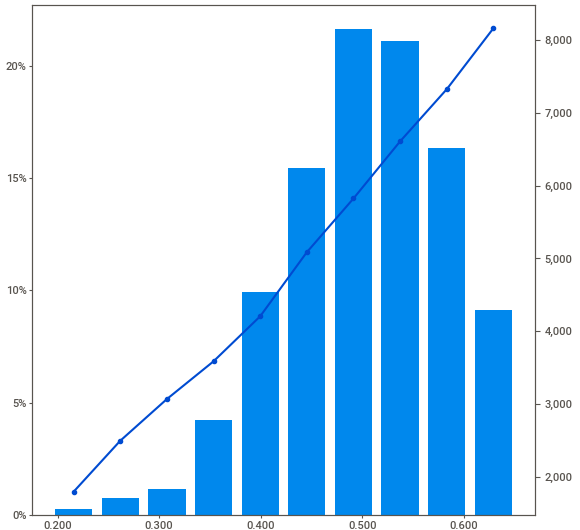
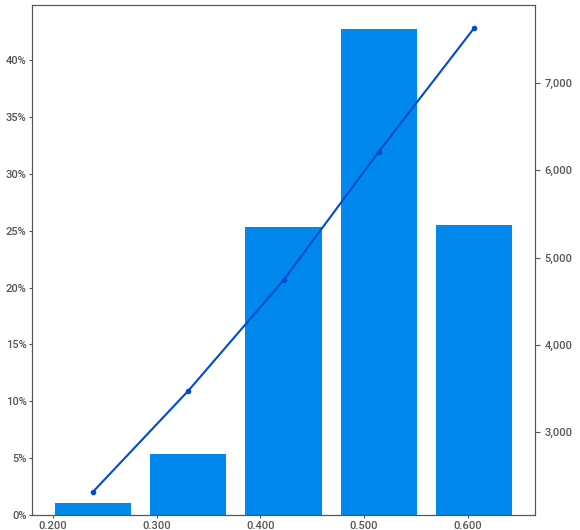
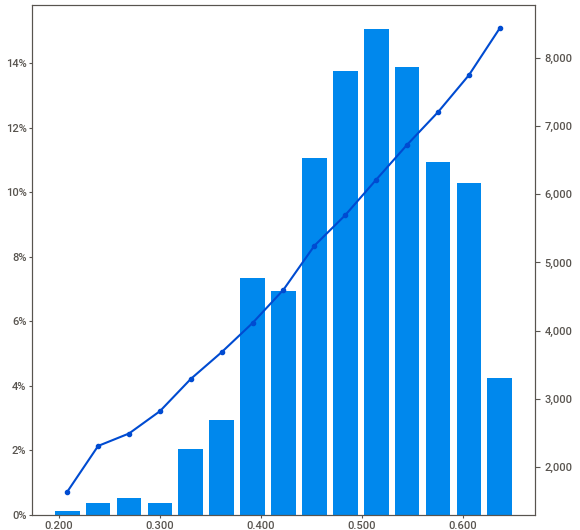
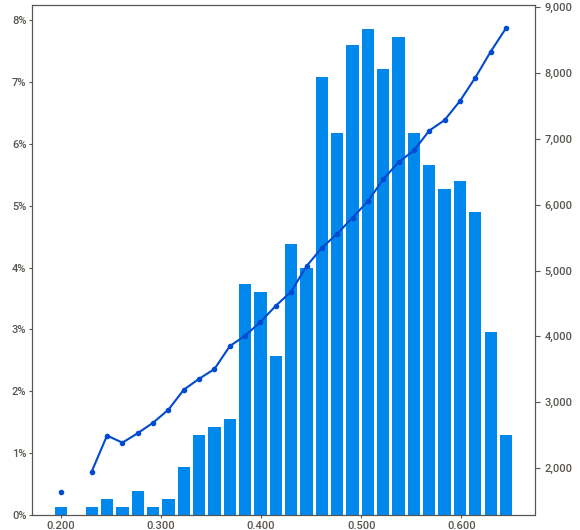
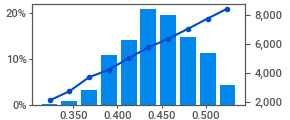
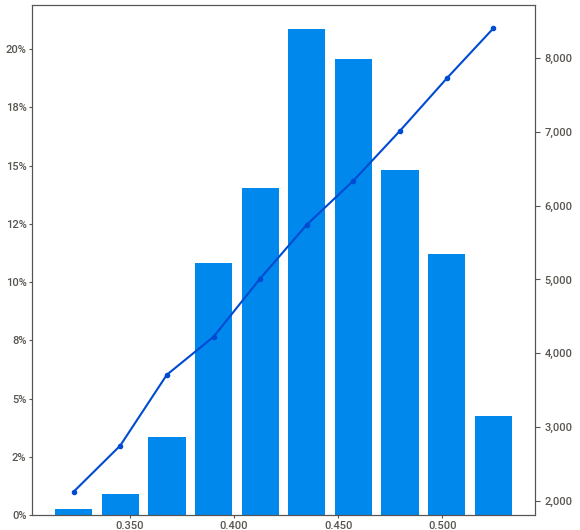
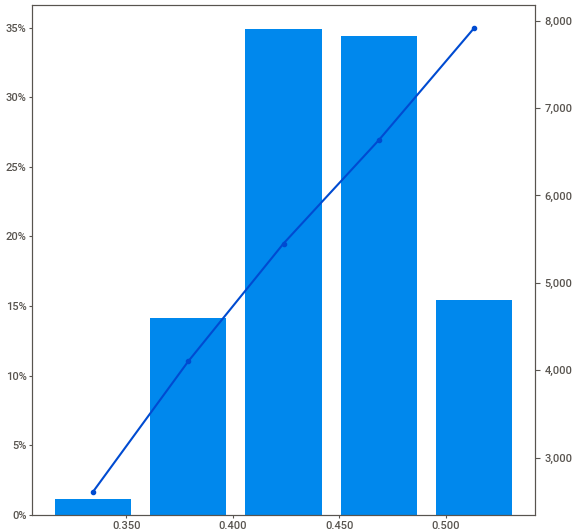
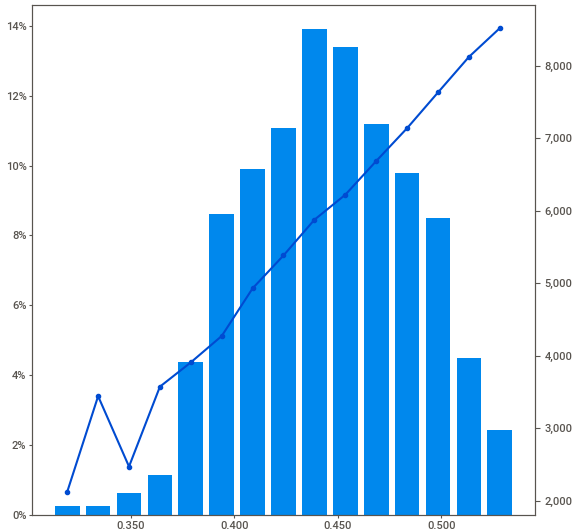
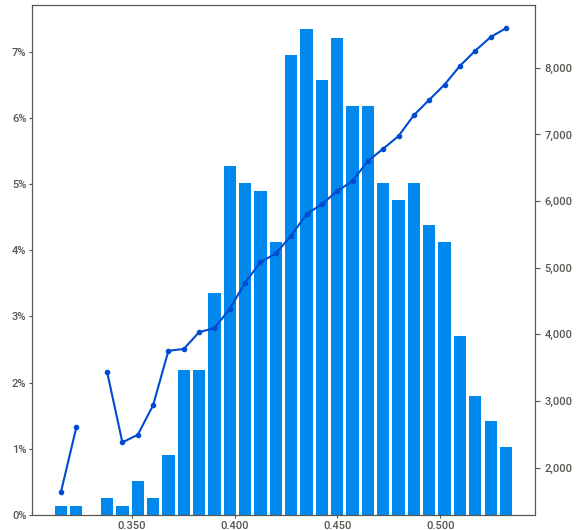
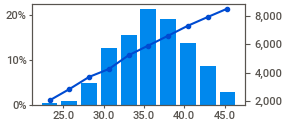
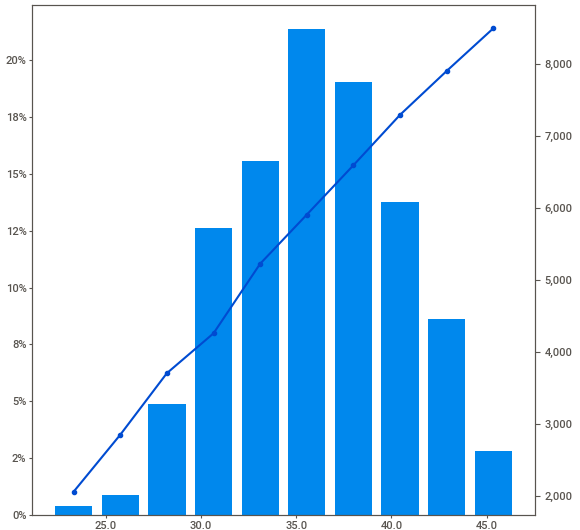
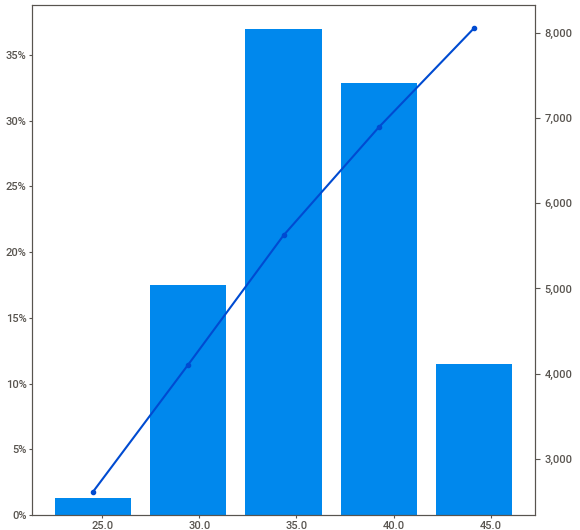
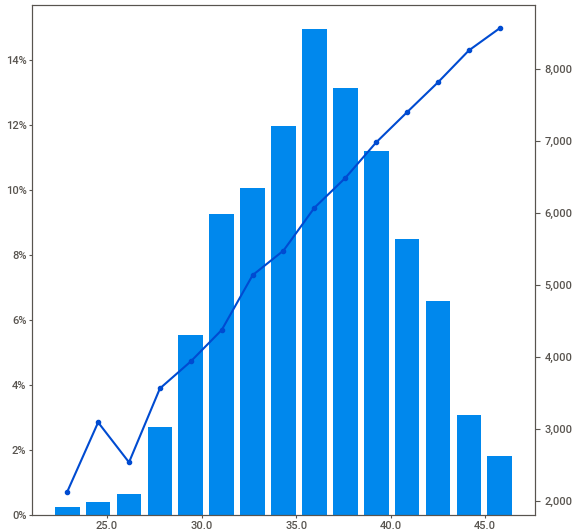
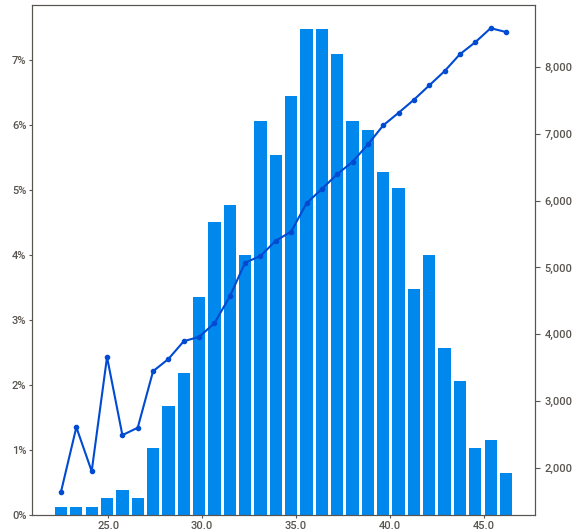
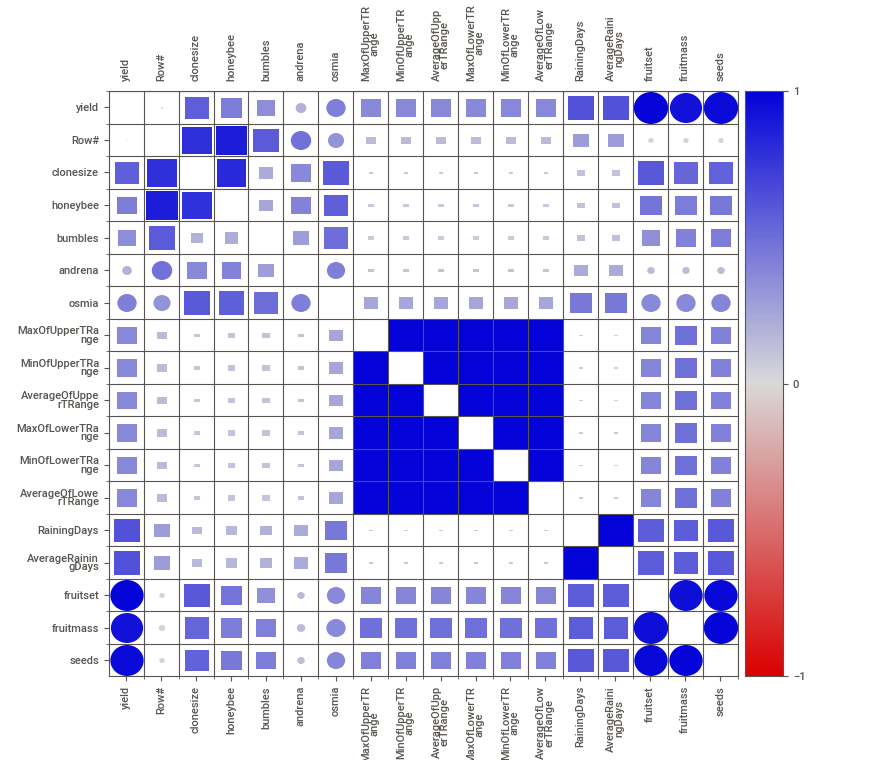
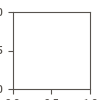

In [28]:
report = sv.analyze(df, target_feat='yield')

# Display the report in Colab
report.show_notebook()

In [29]:
# Displaying df again to ensure everything is still in order, nothing lost or deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [30]:
# AutoViz performs automatic visualization of any dataset with just one line of code.
# It can find the most important features and plot impactful visualizations.
# Also, AutoViz is very fast so it creates visualization within seconds.

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

In [32]:
AV = AutoViz_Class()
report = AV.AutoViz(
    filename="/content/drive/MyDrive/Datasets/WildBlueberryPollinationSimulationData.csv",
    sep=",",
    depVar="yield",
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30
)


Shape of your Data Set loaded: (777, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : ['fruitset', 'fruitmass', 'seeds', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays']
    Integer-Categorical Columns: []
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['Row#']
    Columns that will not be considered in modeling:

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
clonesize,float64,0.000000,NA,10.000000,40.000000,No issue
honeybee,float64,0.000000,NA,0.000000,18.430000,Column has 4 outliers greater than upper bound (0.88) or lower than lower bound(-0.12). Cap them or remove them.
bumbles,float64,0.000000,NA,0.000000,0.585000,Column has 7 outliers greater than upper bound (0.57) or lower than lower bound(0.05). Cap them or remove them.
andrena,float64,0.000000,NA,0.000000,0.750000,Column has 4 outliers greater than upper bound (1.00) or lower than lower bound(0.01). Cap them or remove them.
osmia,float64,0.000000,NA,0.000000,0.750000,Column has 17 outliers greater than upper bound (1.12) or lower than lower bound(0.12). Cap them or remove them.
MaxOfUpperTRange,float64,0.000000,NA,69.700000,94.600000,No issue
MinOfUpperTRange,float64,0.000000,NA,39.000000,57.200000,Column has a high correlation with ['MaxOfUpperTRange']. Consider dropping one of them.
AverageOfUpperTRange,float64,0.000000,NA,58.200000,79.000000,"Column has a high correlation with ['MaxOfUpperTRange', 'MinOfUpperTRange']. Consider dropping one of them."
MaxOfLowerTRange,float64,0.000000,NA,50.200000,68.200000,"Column has a high correlation with ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange']. Consider dropping one of them."
MinOfLowerTRange,float64,0.000000,NA,24.300000,33.000000,"Column has a high correlation with ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange']. Consider dropping one of them."


Number of All Scatter Plots = 136
All Plots are saved in ./AutoViz_Plots/yield
Time to run AutoViz = 60 seconds 


In [33]:
# Both Sweetviz and Autoviz confirm the previous decisions i.e. which columns to select
# and which to drop for model training and prediction.
# One more observation from above is that out of 7 selected columns, number of outliers isn't very
# large.

In [34]:
# As part of preprocessing will use IQR to drop outliers

In [35]:
# define a generic function to remove outliers from a dataframe
def remove_outliers_iqr(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    dataframe_no_outliers = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
    return dataframe_no_outliers

# Apply outlier removal to the entire dataframe
df_no_outliers = remove_outliers_iqr(df)



In [36]:
# Next step is to do feature selection before passing to models for traning

selected_columns = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'yield']
df_selected_columns = df_no_outliers[selected_columns]

# Now, df_selected_columns contains the data without outliers and only with the selected columns

In [37]:
print (df_selected_columns)

     clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0      37.5       0.75     0.25     0.25    0.25         86.0         
1      37.5       0.75     0.25     0.25    0.25         86.0         
2      37.5       0.75     0.25     0.25    0.25         94.6         
3      37.5       0.75     0.25     0.25    0.25         94.6         
4      37.5       0.75     0.25     0.25    0.25         86.0         
..         ...       ...      ...      ...    ...               ...   
754    25.0       0.50     0.38     0.63    0.50         77.4         
755    25.0       0.50     0.38     0.63    0.50         69.7         
756    25.0       0.50     0.38     0.63    0.50         69.7         
757    25.0       0.50     0.38     0.63    0.50         77.4         
758    25.0       0.50     0.38     0.63    0.50         77.4         

     RainingDays     yield     
0       16.0      3813.165795  
1        1.0      4947.605663  
2       16.0      3866.798965  
3        1.0      4

In [38]:
# saving the original dataframe with all columns and data, in case required later for any reason
df_original = df
df = df_selected_columns
# now df contains only 8 columns and no missing values or duplicate data

In [39]:
# importing the 3 model libraries, and those required to split the training and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
# Step 1: Splitting the data into training and testing sets
X = df.drop('yield', axis=1)  # Features
y = df['yield']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Step 2: Training the models
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Model 2: XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
# Model 3: RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
# Step 3: Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

In [45]:
# Step 4: Evaluating models using RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

In [46]:
# Displaying RMSE
print("RMSE - Linear Regression:", rmse_linear)
print("RMSE - XGBoost:", rmse_xgboost)
print("RMSE - RandomForestRegressor:", rmse_random_forest)

RMSE - Linear Regression: 642.2245410389276
RMSE - XGBoost: 220.29161517722466
RMSE - RandomForestRegressor: 249.42084660811835


In [47]:
# Setting up the plotting environment
%matplotlib inline


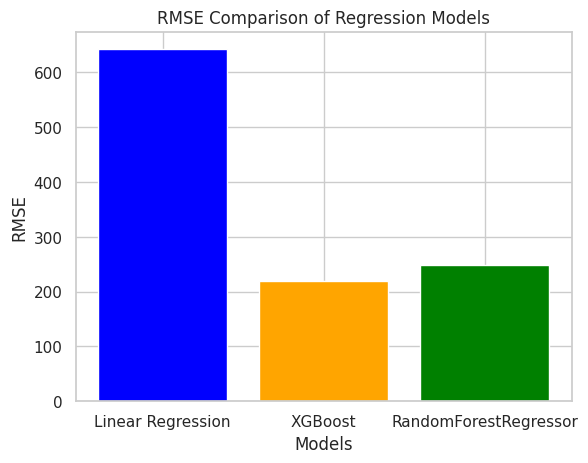

In [49]:
# Step 5: Plotting the initial comparison of 3 models
models = ['Linear Regression', 'XGBoost', 'RandomForestRegressor']
rmse_values = [rmse_linear, rmse_xgboost, rmse_random_forest]

plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('RMSE Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Lower RMSE indicates better model performance.
# XGBoost comes out as the best base model with lowest RMSE

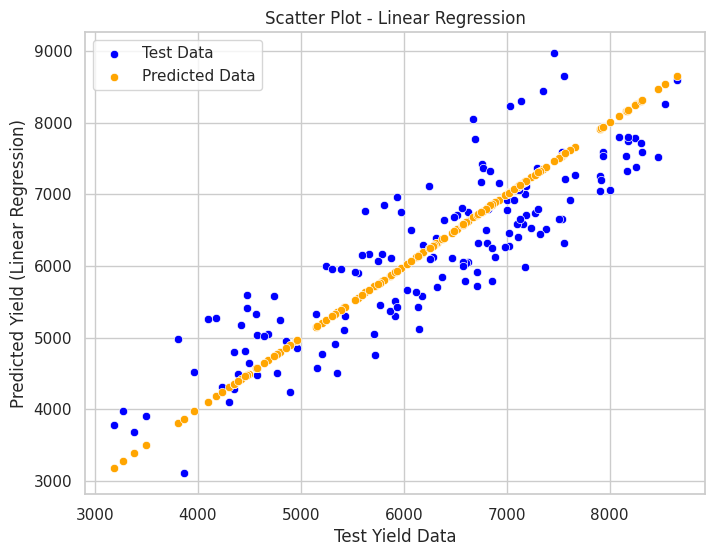

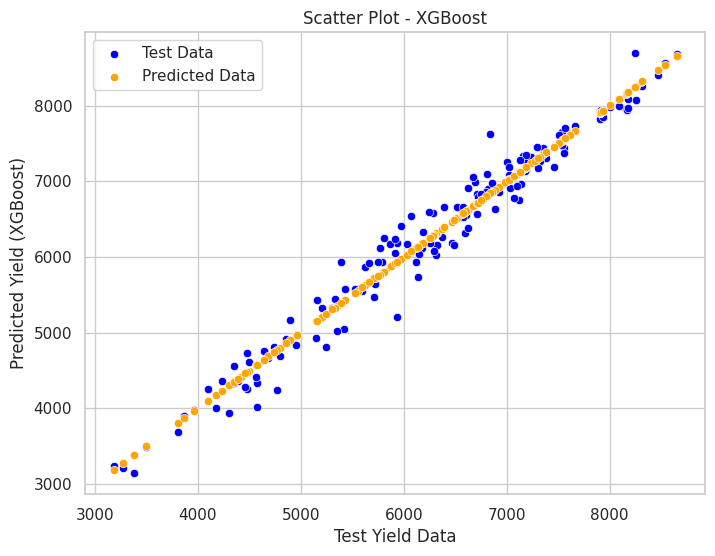

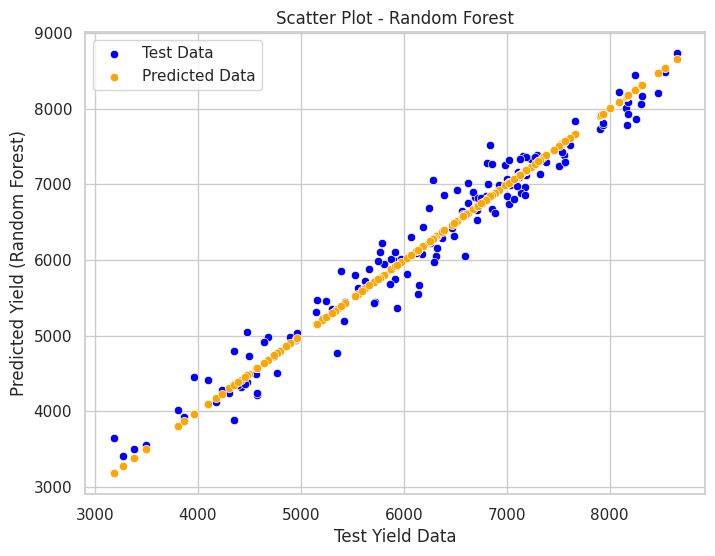

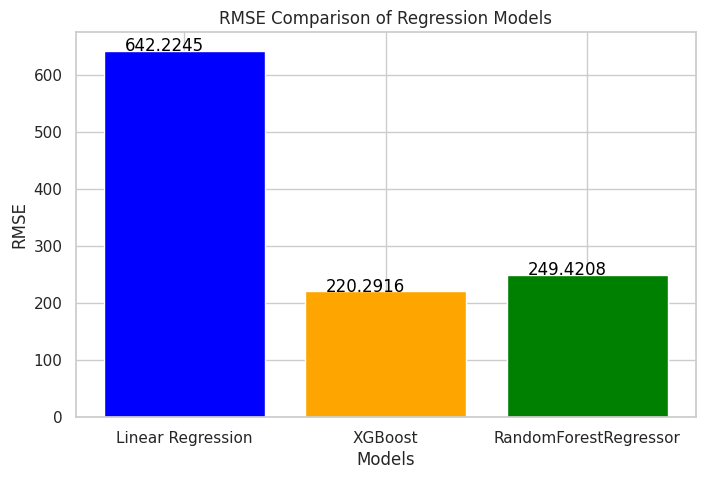

In [50]:
# Code to show scatter plot of predicted yield vs test yield
# test data is in blue and predicted in orange

# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', label='Test Data')
sns.scatterplot(x=y_test, y=y_test, color='orange', label='Predicted Data')
plt.title('Scatter Plot - Linear Regression')
plt.xlabel('Test Yield Data')
plt.ylabel('Predicted Yield (Linear Regression)')
plt.legend()
plt.show()

# Scatter plot for XGBoost
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='blue', label='Test Data')
sns.scatterplot(x=y_test, y=y_test, color='orange', label='Predicted Data')
plt.title('Scatter Plot - XGBoost')
plt.xlabel('Test Yield Data')
plt.ylabel('Predicted Yield (XGBoost)')
plt.legend()
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_random_forest, color='blue', label='Test Data')
sns.scatterplot(x=y_test, y=y_test, color='orange', label='Predicted Data')
plt.title('Scatter Plot - Random Forest')
plt.xlabel('Test Yield Data')
plt.ylabel('Predicted Yield (Random Forest)')
plt.legend()
plt.show()

# Step 6: Plotting the comparison
models = ['Linear Regression', 'XGBoost', 'RandomForestRegressor']
rmse_values = [rmse_linear, rmse_xgboost, rmse_random_forest]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])

# Add labels to bars
for bar, label in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(label, 4), ha='center', color='black')

plt.title('RMSE Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


In [51]:
# Hyper parameter tuning
# Explanation:
# Hyperparameter tuning is essential to find optimal set of parameters for a model,
# leading to better performance.
# GridSearchCV is used to systematically search through a predefined grid of hyperparameters.
# StandardScaler is used in the XGBoost pipeline to standardize features before training.
# The chosen metric for tuning is negative mean squared error (neg_mean_squared_error).
# The best hyperparameters and models are obtained for 2 algorithm.
# Lenear regression model isn't tuned because its simple and nothing much to tune.
# The final step evaluates the tuned models on the test set and displays their RMSE.

In [52]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Steps for hyper tuning
# Step 1: Splitting the data into training and testing sets
X = df.drop('yield', axis=1)  # Features
y = df['yield']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: No hyperparameter tuning for Linear Regression, as it's a simple model



In [53]:
# Step 3: Hyperparameter Tuning for XGBoost
xgboost_model = XGBRegressor()

# Create a pipeline with a StandardScaler and the XGBoost model
pipeline_xgboost = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', xgboost_model)
])

# Define the parameter grid to search
param_grid_xgboost = {
    'xgboost__n_estimators': [50, 100, 150],
    'xgboost__eta': [0.01, 0.1, 0.2],  # 'eta' is often used instead of 'learning_rate'
    'xgboost__max_depth': [3, 4, 5]
}


In [54]:
# Use GridSearchCV for hyperparameter tuning
grid_search_xgboost = GridSearchCV(pipeline_xgboost, param_grid=param_grid_xgboost, scoring='neg_mean_squared_error', cv=5)
grid_search_xgboost.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_xgboost = grid_search_xgboost.best_params_
best_model_xgboost = grid_search_xgboost.best_estimator_

In [55]:
# Step 4: Hyperparameter Tuning for Random Forest
random_forest_model = RandomForestRegressor()

# Define the parameter grid to search
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_random_forest = GridSearchCV(random_forest_model, param_grid=param_grid_random_forest, scoring='neg_mean_squared_error', cv=5)
grid_search_random_forest.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_random_forest = grid_search_random_forest.best_params_
best_model_random_forest = grid_search_random_forest.best_estimator_


In [56]:
# Step 5: Evaluate the Tuned Models on the Test Set
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# XGBoost
y_pred_xgboost = best_model_xgboost.predict(X_test)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))

# Random Forest
y_pred_random_forest = best_model_random_forest.predict(X_test)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

# Display RMSE for Tuned Models
print("RMSE - Linear Regression:", rmse_linear)
print("RMSE - XGBoost (Tuned):", rmse_xgboost)
print("RMSE - Random Forest (Tuned):", rmse_random_forest)

RMSE - Linear Regression: 642.2245410389276
RMSE - XGBoost (Tuned): 202.47522580581096
RMSE - Random Forest (Tuned): 249.9981512387421


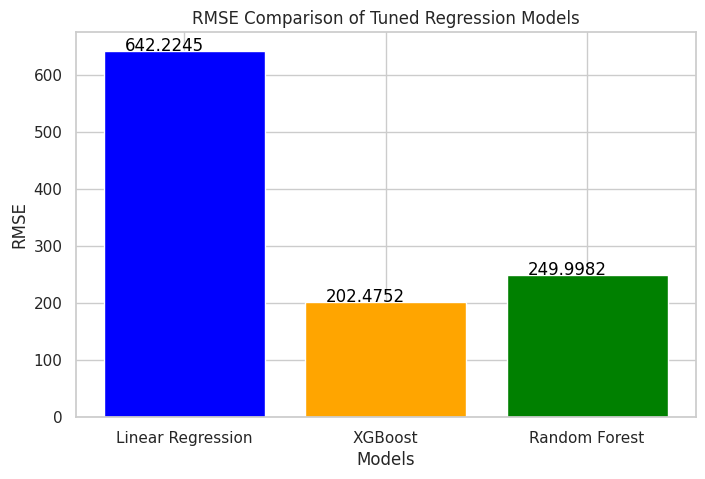

In [57]:
# Step 6: Displaying the Best Tuned Models on a Graph
models = ['Linear Regression', 'XGBoost', 'Random Forest']
rmse_values_tuned = [rmse_linear, rmse_xgboost, rmse_random_forest]

plt.figure(figsize=(8, 5))
bars_tuned = plt.bar(models, rmse_values_tuned, color=['blue', 'orange', 'green'])

# Add labels to bars
for bar, label in zip(bars_tuned, rmse_values_tuned):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(label, 4), ha='center', color='black')

plt.title('RMSE Comparison of Tuned Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

In [58]:
# After doing the tuning, RMSE of XGBoost improved from 220 to 202, Random forest score
# remains same 249